# Titanic Dataset - Competition

In [1]:
# importing the libraries
import numpy as np
import pandas as pd

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing and selection libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from feature_engine.selection import SelectBySingleFeaturePerformance

# machine learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss

In [2]:
# uploading the data
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [3]:
print('The shape of train set: {}'.format(train_df.shape))
print('The shape of test set: {}'.format(test_df.shape))

The shape of train set: (891, 12)
The shape of test set: (418, 11)


In [4]:
print('The columns of train:\n')
print(train_df.columns)
print('The columns of test:\n')
print(test_df.columns)

The columns of train:

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
The columns of test:

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Because of containing many unique features, the columns "Name" and "Ticket" are useless. Thus, they can be deleted

In [5]:
# deleting the useless columns
del train_df['Name']
del train_df['Ticket']
del test_df['Name']
del test_df['Ticket']

In [6]:
print('\033[1m \033[94m \033[4m' + 'The information of data:\n' + '\033[0m')
train_df.info()

  The information of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [7]:
print('\033[1m \033[94m \033[4m' + 'The information of data:\n' + '\033[0m')
test_df.info()

  The information of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


<div class="alert alert-block alert-info">
<b>Note:</b> The columns are of integer, float and object types. Moreover, some columns contain missing values.
</div>

In [8]:
# desciribing only meaningful columns
num_imp_col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print('\033[1m \033[94m \033[4m' + 'The numerical data can be described as following\n' + '\033[0m')
train_df[num_imp_col].describe()

  The numerical data can be described as following



,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# desciribing only meaningful columns
num_imp_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print('\033[1m \033[94m \033[4m' + 'The numerical data can be described as following\n' + '\033[0m')
test_df[num_imp_col].describe()

  The numerical data can be described as following



,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


  The histogram for Survived


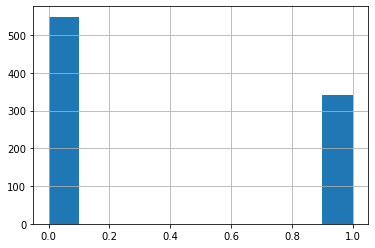

  The histogram for Pclass


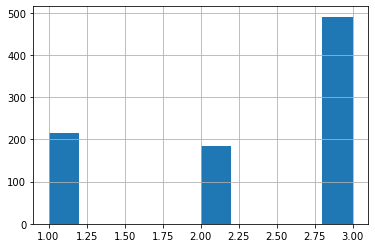

  The histogram for Sex


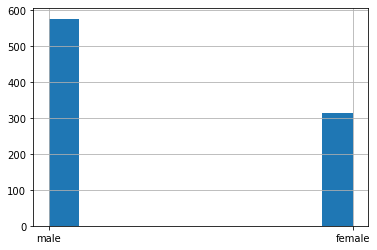

  The histogram for Age


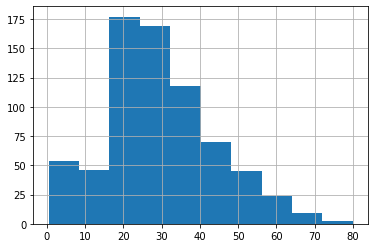

  The histogram for SibSp


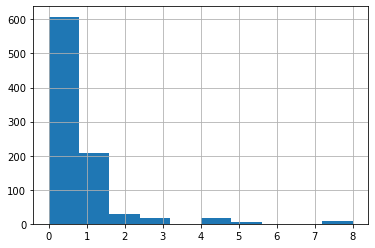

  The histogram for Parch


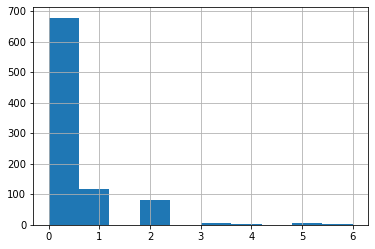

  The histogram for Fare


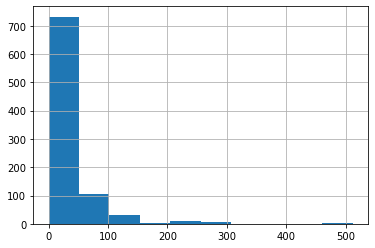

  The histogram for Cabin


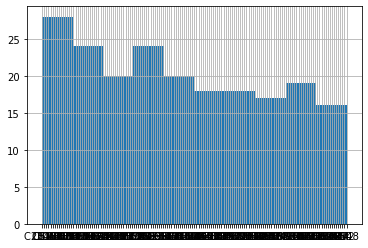

  The histogram for Embarked


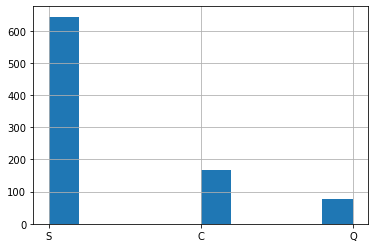

In [10]:
# plotting the histograms of the columns
col_for_hist = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
for i in train_df[col_for_hist]:
    print('\033[1m \033[94m \033[4m' +  'The histogram for {}'.format(i) + '\033[0m')
    train_df[i].hist()
    plt.show()

## KDE for survived and not survived males and females

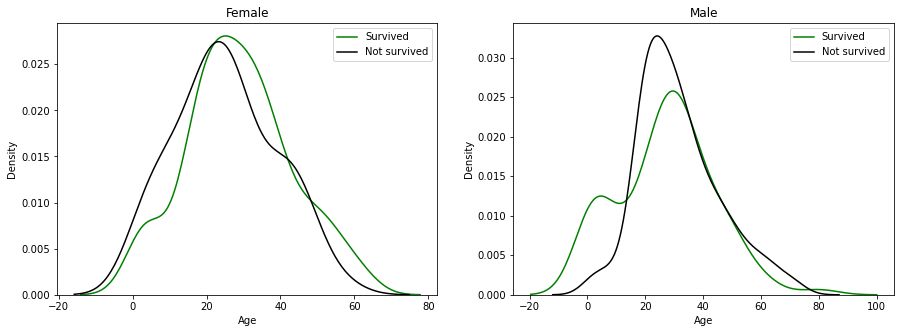

In [11]:
lived = 'Survived'
died = 'Not survived'
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize = (15, 5))
female = train_df[train_df['Sex'] == 'female']
male = train_df[train_df['Sex'] == 'male']
ax = sns.kdeplot(female[female['Survived'] == 1].Age.dropna(), label = lived, ax = axes[0], color = "green")
ax = sns.kdeplot(female[female['Survived'] == 0].Age.dropna(), label = died, ax = axes[0], color = "black")
ax.legend()
ax.set_title('Female')
ax = sns.kdeplot(male[male['Survived'] == 1].Age.dropna(), label = lived, ax = axes[1], color = "green")
ax = sns.kdeplot(male[male['Survived'] == 0].Age.dropna(), label = died, ax = axes[1], color = "black")
ax.legend()
ax.set_title('Male');

## Preprocessing of missing values

In [12]:
print('\033[1m \033[94m \033[4m' +  'The percentage of missing values:\n' )
train_df.isnull().mean()*100

  The percentage of missing values:



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
print('\033[1m \033[94m \033[4m' +  'The percentage of missing values:\n' )
test_df.isnull().mean()*100

  The percentage of missing values:



PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<div class="alert alert-block alert-info">
<b>Missing value Note:</b> The percentages of missing values are provided above. Because the 'Cabin' column has the highest percentage of missing values (77%>30%), this column is useless and we can delete it. While numerical columns will be imputed by the median, the dropping of missing values in 'Embarked' (because of its lowest rate) will have no impact on the data.
</div>

In [14]:
# deleting column
del train_df['Cabin']
del test_df['Cabin']

In [15]:
# imputing data
def impute_Na(df, variable, value):
    return df[variable].fillna(value)

cols = ['Age', 'Fare', 'Survived']
for i in train_df[cols]:
    train_df[i] = impute_Na(train_df,i,train_df[i].median())
    
# dropping missing values
train_df = train_df.dropna()    

In [16]:
# imputing data
def impute_Na(df, variable, value):
    return df[variable].fillna(value)

cols = ['Age', 'Fare']
for i in test_df[cols]:
    test_df[i] = impute_Na(test_df,i,test_df[i].median())
    
# dropping missing values
test_df = test_df.dropna()    

## Correlation

<AxesSubplot:>

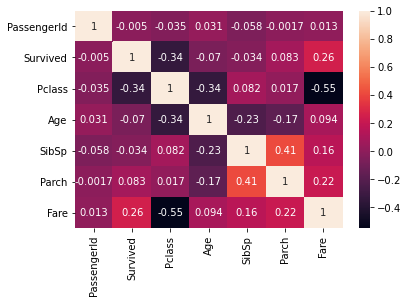

In [17]:
sns.heatmap(train_df.corr(), annot = True)

<AxesSubplot:>

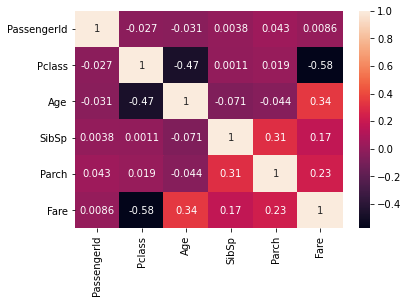

In [18]:
sns.heatmap(test_df.corr(), annot = True)

<div class="alert alert-block alert-info">
<b>Correlation Note:</b> Correlation is an important term in Statistics and Data Science and should be observed detailly. However, sometimes it creates redundancy which should be removed. 
</div>


In [19]:
correl_Feat = set() 
correl_matrix = train_df.corr()
    
for i in range(len(correl_matrix.columns)):
    for j in range(i):
        if abs(correl_matrix.iloc[i, j]) > 0.8:
            colName = correl_matrix.columns[i]  
            correl_Feat.add(colname)
train_df.drop(labels=correl_Feat, axis=1, inplace=True)

In [20]:
correl_Feat = set() 
correl_matrix = test_df.corr()
    
for i in range(len(correl_matrix.columns)):
    for j in range(i):
        if abs(correl_matrix.iloc[i, j]) > 0.8:
            colName = correl_matrix.columns[i]  
            correl_Feat.add(colname)
test_df.drop(labels=correl_Feat, axis=1, inplace=True)

In [21]:
X_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df["Survived"]
train_names = X_train.columns
X_test = test_df.copy()

## Encoding categorical data

<div class="alert alert-block alert-info">
<b>Encoding Note:</b> Some Machine Learning algorithms are sensitive for categorical data. For this justification, the categorical data is encoded by using LabelEncoder().
</div>

In [22]:
LE = LabelEncoder()
X_train['Sex'] = LE.fit_transform(X_train['Sex'])
X_train['Embarked'] = LE.fit_transform(X_train['Embarked'])
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [23]:
LE = LabelEncoder()
X_test['Sex'] = LE.fit_transform(X_test['Sex'])
X_test['Embarked'] = LE.fit_transform(X_test['Embarked'])
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,27.0,0,0,8.0500,2


  The histogram for Pclass


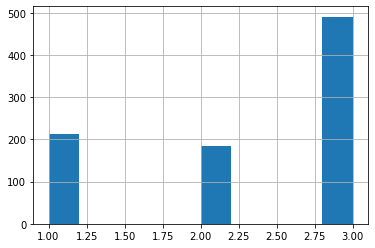

  The histogram for Sex


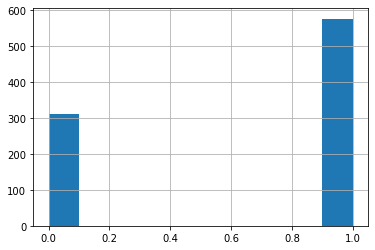

  The histogram for Age


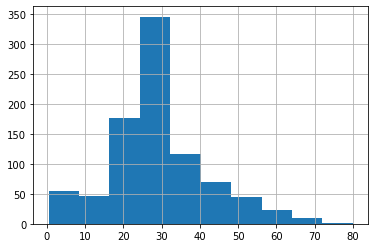

  The histogram for SibSp


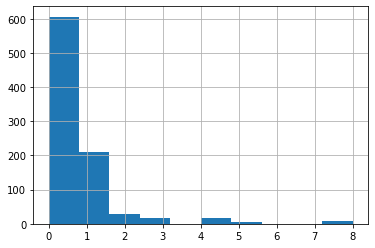

  The histogram for Parch


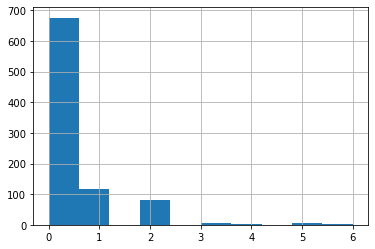

  The histogram for Fare


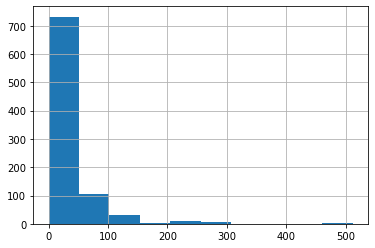

  The histogram for Embarked


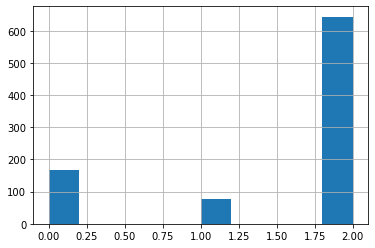

In [24]:
# Checking the distribution for X_train set
col_for_hist_train = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
for i in X_train[col_for_hist_train]:
    print('\033[1m \033[94m \033[4m' +  'The histogram for {}'.format(i) + '\033[0m')
    X_train[i].hist()
    plt.show()

## Feature Selection

<div class="alert alert-block alert-info">
<b>Feature Selection:</b> Sometimes some of the columns are useless in ML models by creating redundancy. That is why it is better to select the columns carefully.
</div>

In [25]:
# Using RandomForestClassifier for univariate analysis
RF = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=4)
sel = SelectBySingleFeaturePerformance(variables=None, estimator=RF, scoring="roc_auc", cv=10, threshold=0.5)

sel.fit(X_train, y_train)
sel.feature_performance_

{'PassengerId': 0.44505347593582895,
 'Pclass': 0.6800920974450386,
 'Sex': 0.7659180035650625,
 'Age': 0.55856110120816,
 'SibSp': 0.5969602891661714,
 'Parch': 0.5731530996236878,
 'Fare': 0.7230704099821746,
 'Embarked': 0.5750519904931669}

Text(0, 0.5, 'roc-auc')

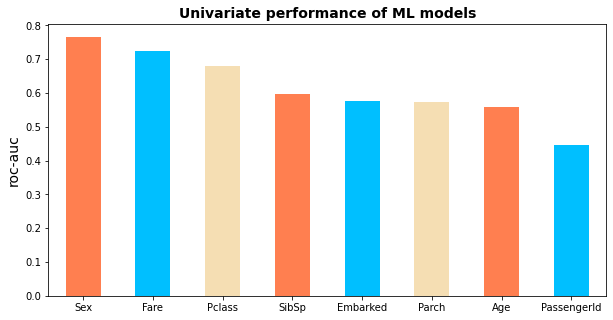

In [26]:
# plotting the imporance of the features
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(10, 5), color = ['coral', 'deepskyblue', 'wheat'])
plt.title('Univariate performance of ML models', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.ylabel('roc-auc', fontsize=14)

## Application of Machine Learning Models

<div class="alert alert-block alert-info">
<b>Machine Learning:</b> Different Machine Learning Models have been used for finding the best accuracy.
</div>

These models are as following
* 1. Naive Bayes:
    *   a. GaussianNB()
    *   b. MultinomialNB()
    *   c. BernoulliNB()
    *   d. ComplementNB()
* 2. Random Forest Classifier.
* 3. Logistic Regression.
* 4. Desicion Tree Classifier.

### 1. Naive Bayes 

In [27]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
classes = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB()               
                  ]  
for clf in classes:
    clf.fit(X_train, y_train)
    mod_name = clf.__class__.__name__
    print('\033[1m' + mod_name + '\033[0m')
    print('*** Results ***')
    y_pred = clf. predict(X_test)
    print('Accuracy: {:.2%}'.format(clf.score(X_train, y_train)))
    print("="*60)
    nb_submission = pd.DataFrame({
        "PassengerId": X_test.PassengerId,
        "Survived": y_pred})
    nb_submission.to_csv('{}.csv'.format(clf), index=False)

    
y_pred

GaussianNB
*** Results ***
Accuracy: 79.19%
MultinomialNB
*** Results ***
Accuracy: 66.48%
BernoulliNB
*** Results ***
Accuracy: 78.52%
ComplementNB
*** Results ***
Accuracy: 66.37%


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 2. Logistic Regression

In [28]:
llf = LogisticRegression(random_state=0).fit(X_train, y_train)
print('Accuracy: {:.2%}'.format(llf.score(X_train, y_train)))
y_pred2 = llf.predict(X_test)
log_submission = pd.DataFrame({
    "PassengerId": X_test.PassengerId,
    "Survived": y_pred2})
log_submission.to_csv('LogisticRegression.csv', index=False)

Accuracy: 80.09%


C:\Users\Zaur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
### 3. Random Forest Clasifier

In [30]:
print('\033[1m' + 'RandomForestClassifier()' + '\033[0m')
rlf = RandomForestClassifier(max_depth=5, random_state=0)
rlf.fit(X_train, y_train)
print('Accuracy: {:.2%}'.format(rlf.score(X_train, y_train)))
y_pred1 = rlf.predict(X_test)
rlf_submission = pd.DataFrame({
        "PassengerId": X_test.PassengerId,
        "Survived": y_pred1})
rlf_submission.to_csv('RandomForestClassifier().csv', index=False)    


RandomForestClassifier()
Accuracy: 86.05%


In [31]:
### 4. KNN Classifier

In [32]:
print('\033[1m' + 'KNeigborsClassfier()' + '\033[0m')
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print('Accuracy: {:.2%}'.format(knn.score(X_train, y_train)))
y_pred4 = knn.predict(X_test)
knn_submission = pd.DataFrame({
        "PassengerId": X_test.PassengerId,
        "Survived": y_pred4})
knn_submission.to_csv('KNeigborsClassifier().csv', index=False)


KNeigborsClassfier()
Accuracy: 80.20%


In [33]:
### 5. Decision Tree Classifier

In [34]:
print('\033[1m' + 'DecisionTreeClassifier()' + '\033[0m')
dtc =  DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print('Accuracy: {:.2%}'.format(dtc.score(X_train, y_train)))
y_pred5 = dtc.predict(X_test)
dtc_submission = pd.DataFrame({
        "PassengerId": X_test.PassengerId,
        "Survived": y_pred5})
dtc_submission.to_csv('DecisionTreeClassifier().csv', index=False)


DecisionTreeClassifier()
Accuracy: 100.00%


According to the accuracy results, DecisionTreeClassifier() can define all the cases correctly. However, this can be the outcome of **overfitting**, as well. This should be researched again. 
However, RandomForestClassifier is also a good predictor for this problem.

**The files were submitted for competition**